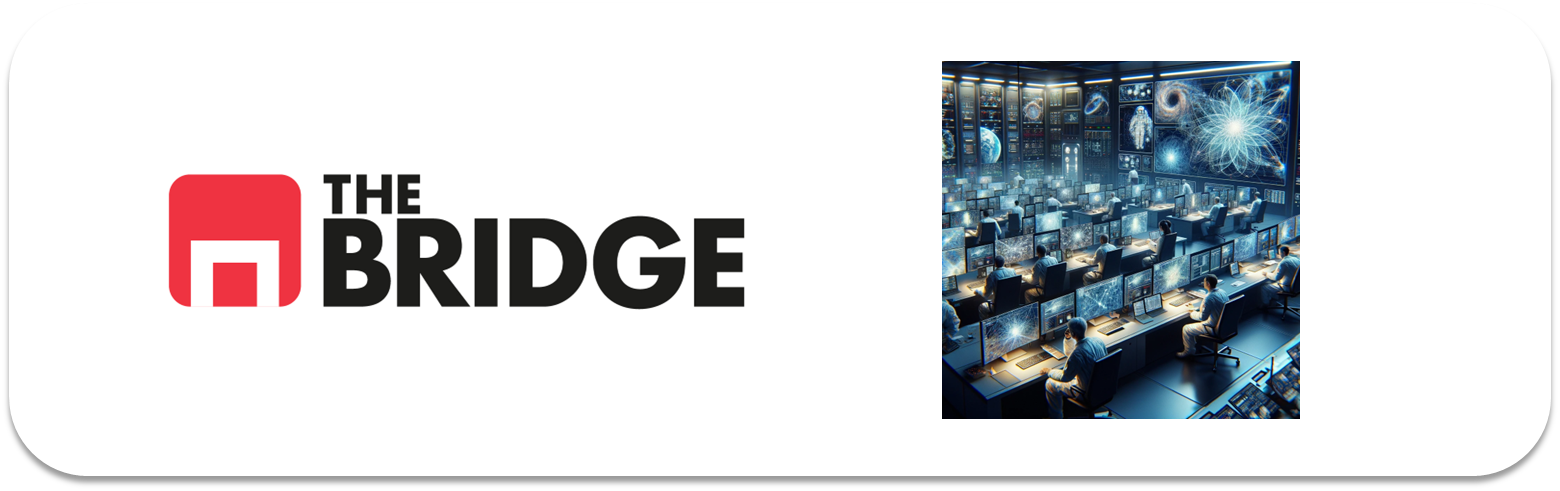

## PRACTICA OBLIGATORIA: **Transfer Learning y Fine Tuning**

* La práctica obligatoria de esta unidad consiste en un repetir el ejercicio de construcción de un modelo de clasificación de paisajes pero usando un modelo preentrenado. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [13]:
# Importaciones necesarias
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import cv2

### Objetivo del ejercicio

Comparar una red convolucional hecha ad-hoc frente a los modelos preentrenados y ajustados con fine tuning y transfer learning. Para ello emplea el dataset de paisajes del conjunto de ejercicios de la unidad anterior.


### Se pide

1. Preparar los datos del modelo y las funciones de visualización, copia para ello todo lo que necesites de las soluciones del ejercicio de clasificación de paisajes de la unidad anterior.

2. Escoger entre uno de los modelos VGG-19, InceptionV3 y MobileNetV2 (todos en https://keras.io/api/applications/) (Se aconseja este último si no tenemos un ordenador muy potente). Si no te haces con estos puedes recurrir a la ResNetV50.

4. Hacer un transfer-learning con una cabeza de como mucho 2 capas densas ocultas y una de salida. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.

5. Hacer un fine-tuning con la misma cabeza diseñada en el punto anterior. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.

6. Comparar los resultados con los obtenidos con la red convolucional del ejercicio mencionado.

EXTRA:
- Repetir el transfer learning empleando aumentado de imágenes.



In [14]:
# Función para leer y redimensionar imágenes
def read_data(directorios, reshape_dim=(32, 32)):
    X = []
    y = []
    mapa_imagen_fichero = []
    
    for directorio in directorios:
        for file in os.listdir(directorio):
            image = cv2.imread(os.path.join(directorio, file))
            image = cv2.resize(image, reshape_dim)  # Redimensionar a 32x32
            X.append(image)
            y.append(file.split(".")[0])  # El nombre del archivo es la clase
            mapa_imagen_fichero.append(file)
    
    return np.array(X), np.array(y), mapa_imagen_fichero

In [15]:
# Directorios de datos
PATH_DATA = "./data/"
train_dirs = [f"{PATH_DATA}github_train_{i}" for i in range(0, 4)]
test_dir = f"{PATH_DATA}github_test"

# Cargar datos
X_train, y_train, train_map = read_data(train_dirs, reshape_dim=(32, 32))
X_test, y_test, test_map = read_data([test_dir], reshape_dim=(32, 32))

# Normalizar las imágenes
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convertir etiquetas a números
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [16]:
# Crear el modelo CNN
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2), padding='same'),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Clasificación binaria
])

# Compilar el modelo
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

c:\Users\aperez\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Entrenamiento con Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train,
    y_train_encoded,
    validation_split=0.2,
    batch_size=32,
    epochs=20,
    callbacks=[early_stop]
)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.6084 - loss: 0.7176 - val_accuracy: 0.0000e+00 - val_loss: 0.9385
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.6158 - loss: 0.6537 - val_accuracy: 0.0113 - val_loss: 0.8922
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.6346 - loss: 0.6296 - val_accuracy: 0.2962 - val_loss: 0.8253
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.6910 - loss: 0.5954 - val_accuracy: 0.3725 - val_loss: 0.8373
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.7154 - loss: 0.5606 - val_accuracy: 0.4625 - val_loss: 0.8193
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.7235 - loss: 0.5378 - val_accuracy: 0.6900 - val_loss: 0.5983
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.7423 - loss: 0.5160 - val_accuracy: 0.4638 - val_loss: 0.8377
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.7642 - loss: 0.4887 - val_

In [18]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"\nTest Accuracy: {accuracy:.2f}")

# Predicciones
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Reporte de clasificación
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_classes))

# Matriz de confusión
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred_classes))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7206 - loss: 0.5414

Test Accuracy: 0.73
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       500
           1       0.73      0.74      0.73       500

    accuracy                           0.73      1000
   macro avg       0.73      0.73      0.73      1000
weighted avg       0.73      0.73      0.73      1000

Confusion Matrix:
[[359 141]
 [128 372]]


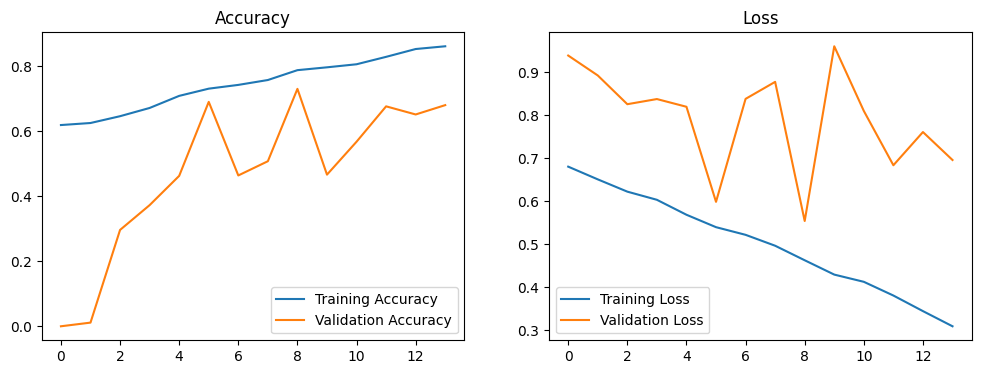

In [19]:
# Visualización de curvas de entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [20]:
# Selección de imágenes mal clasificadas
from sklearn.utils import shuffle

# Convertir etiquetas a números
y_test_num = np.array([0 if y == "cat" else 1 for y in y_test])

# Obtener predicciones
predictions = model.predict(X_test)
y_pred = ["dog" if prediction[0] > 0.5 else "cat" for prediction in predictions]

# Calcular confianza
confianza = [(1 - prediction[0]) if prediction[0] <= 0.5 else prediction[0] for prediction in predictions]

# Crear DataFrame
df_pred = pd.DataFrame({
    "ficheros": test_map,
    "True": [file.split(".")[0] for file in test_map],
    "Prediction": y_pred,
    "Confianza": confianza
})

# Filtrar imágenes mal clasificadas
errores = df_pred["True"] != df_pred["Prediction"]
son_gatos = df_pred["True"] == "cat"
son_perros = df_pred["True"] == "dog"

gatos_dificiles = df_pred[son_gatos & errores]["Confianza"].nlargest(int(len(df_pred[son_gatos & errores]) * 0.1)).index.to_list()
perros_dificiles = df_pred[son_perros & errores]["Confianza"].nlargest(int(len(df_pred[son_perros & errores]) * 0.1)).index.to_list()

# Mostrar imágenes mal clasificadas
df_pred.loc[gatos_dificiles]
df_pred.loc[perros_dificiles]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


,ficheros,True,Prediction,Confianza
598,dog.8451.jpg,dog,cat,0.997948
680,dog.8764.jpg,dog,cat,0.996887
738,dog.8951.jpg,dog,cat,0.963059
537,dog.8215.jpg,dog,cat,0.955314
693,dog.8806.jpg,dog,cat,0.954687
772,dog.9068.jpg,dog,cat,0.929335
851,dog.9346.jpg,dog,cat,0.927394
926,dog.9631.jpg,dog,cat,0.923484
717,dog.8882.jpg,dog,cat,0.915482
933,dog.9649.jpg,dog,cat,0.914894


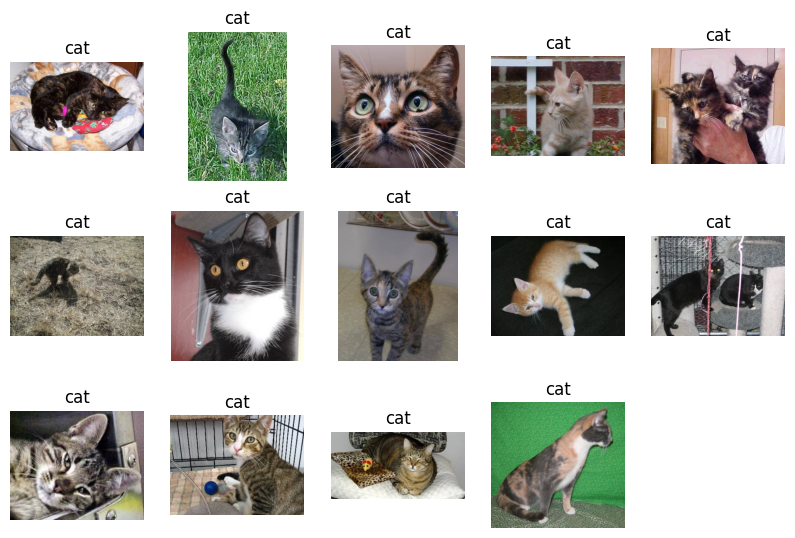

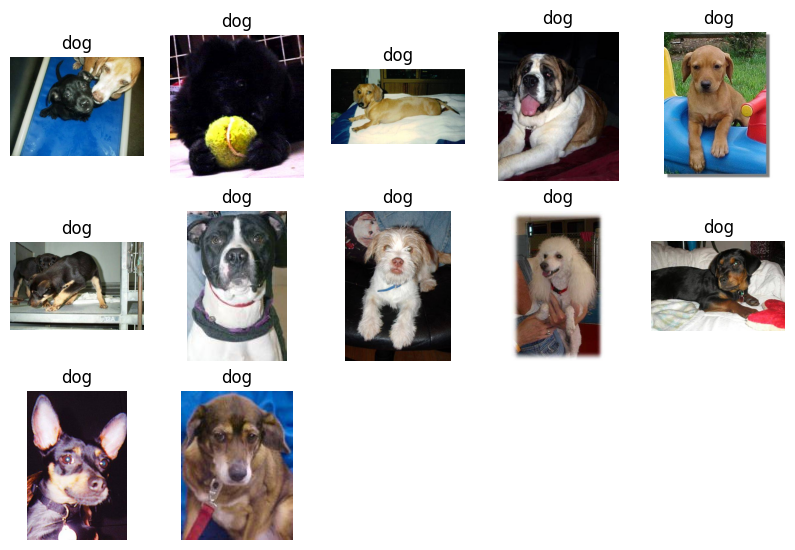

In [21]:
# Función para mostrar imágenes
def show_images_files(pets, names=[], n_cols=5, size_scale=2, train=False, indice=0):
    n_rows = ((len(pets) - 1) // n_cols + 1)
    plt.figure(figsize=(n_cols * size_scale, n_rows * 1.1 * size_scale))
    for index, filepet in enumerate(pets):
        plt.subplot(n_rows, n_cols, index + 1)
        if train:
            pet = imread(PATH_DATA + f"github_train_{indice}/" + filepet)
        else:
            pet = imread(PATH_DATA + "github_test/" + filepet)
        plt.imshow(pet)
        plt.axis("off")
        if len(names):
            plt.title(names[index])

# Mostrar imágenes mal clasificadas
show_images_files(df_pred.loc[gatos_dificiles]["ficheros"], df_pred.loc[gatos_dificiles]["True"].values, train=False)
show_images_files(df_pred.loc[perros_dificiles]["ficheros"], df_pred.loc[perros_dificiles]["True"].values, train=False)